In [5]:
import torch
import torch.nn as nn
import os
from PIL import Image
import numpy as np
from torchvision.transforms.functional import normalize
import matplotlib.pyplot as plt
from model import UNet

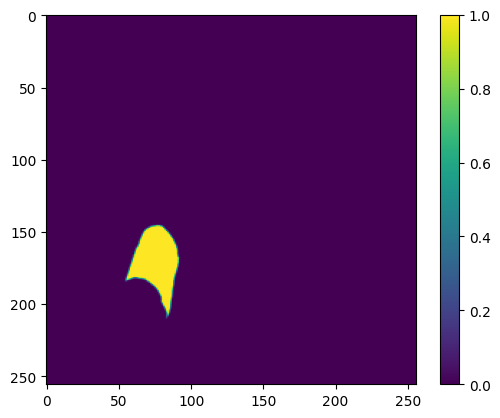

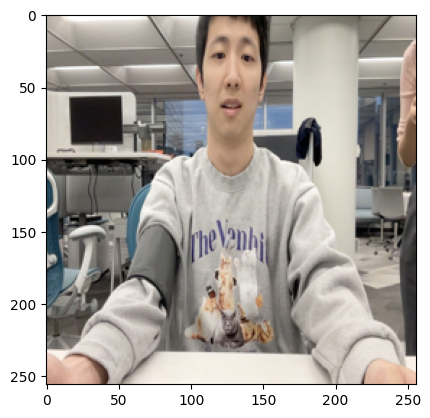

In [16]:
device = torch.device("cpu")
model = UNet(3, 1)
model.load_state_dict(torch.load("./output/unet.pth")["model"])
model = model.to(device)
model.eval()

image = Image.open(r"./original/Photo on 2023-10-19 at 6.16 PM.jpg")
mask = Image.open(r"./annotated/Photo on 2023-10-19 at 6.16 PM.jpg")

mask = torch.tensor(np.asarray(mask.resize((256, 256)), dtype=np.float32) / 255)
image = torch.tensor(np.asarray(image.resize((256, 256)), dtype=np.float32) / 255)
plt.imshow(mask)
plt.colorbar()
plt.figure()
plt.imshow(image)

mask = torch.unsqueeze(mask, 0)
mask = torch.unsqueeze(mask, 0)
image = torch.reshape(image, (3, 256, 256))
image = torch.unsqueeze(image, 0)
image = normalize(image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], inplace=True)

tensor(0.5834, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


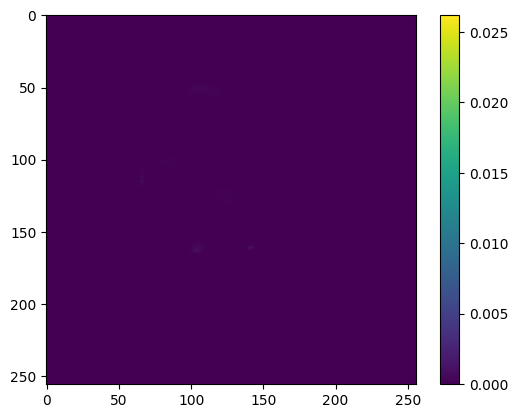

In [17]:
output = model(image)

loss = torch.nn.BCEWithLogitsLoss()

print(loss(output, mask))

t = np.transpose(np.squeeze(torch.sigmoid(output.detach()).cpu().numpy(), 0), (1, 2, 0))
plt.imshow(t)
plt.colorbar()